## **MODEL BUILDING**


## **1.Importing Required Libraries**

In [57]:
import pandas as pd
import numpy as np
import keras
import pickle
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score

## **2.Read the dataset**

In [2]:
ds =pd.read_csv("dataset_website.csv")

In [3]:
ds.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


## **3.Handling null values**

In [4]:
ds.shape

(11055, 32)

In [5]:
ds.columns

Index(['index', 'having_IPhaving_IP_Address', 'URLURL_Length',
       'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting',
       'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report', 'Result'],
      dtype='object')

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

In [7]:
ds.isnull().any()

index                          False
having_IPhaving_IP_Address     False
URLURL_Length                  False
Shortining_Service             False
having_At_Symbol               False
double_slash_redirecting       False
Prefix_Suffix                  False
having_Sub_Domain              False
SSLfinal_State                 False
Domain_registeration_length    False
Favicon                        False
port                           False
HTTPS_token                    False
Request_URL                    False
URL_of_Anchor                  False
Links_in_tags                  False
SFH                            False
Submitting_to_email            False
Abnormal_URL                   False
Redirect                       False
on_mouseover                   False
RightClick                     False
popUpWidnow                    False
Iframe                         False
age_of_domain                  False
DNSRecord                      False
web_traffic                    False
P

In [8]:
ds.describe()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **4.Splitting the Data**

In [9]:
y = ds['Result']
X = ds.drop('Result',axis=1)
X.shape, y.shape

((11055, 31), (11055,))

In [10]:
x=ds.iloc[:,1:31].values
y=ds.iloc[:,-1].values
print(x,y)

[[-1  1  1 ...  1  1 -1]
 [ 1  1  1 ...  1  1  1]
 [ 1  0  1 ...  1  0 -1]
 ...
 [ 1 -1  1 ...  1  0  1]
 [-1 -1  1 ...  1  1  1]
 [-1 -1  1 ... -1  1 -1]] [-1 -1 -1 ... -1 -1 -1]


### **5.ML Model Training**

In [93]:
Model=[]
train=[]
test=[]
f1_score = []
recall = []
precision = []
def Result(model,a,b,c,d,e):
  Model.append(model)
  train.append(round(a,7))
  test.append(round(b,7))
  f1_score.append(round(c, 7))
  recall.append(round(d, 7))
  precision.append(round(e, 7))
  

In [124]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

In [125]:
x_train

array([[ 1,  1,  1, ...,  1,  0,  1],
       [ 1, -1,  1, ...,  1,  0,  1],
       [ 1, -1,  1, ...,  1,  0,  1],
       ...,
       [-1,  1,  1, ...,  1,  1,  1],
       [-1, -1,  1, ...,  1,  1,  1],
       [ 1, -1,  1, ...,  1,  1,  1]])

### **Logistic Regression**



In [126]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [127]:
y_test_lr = lr.predict(x_test)
y_train_lr = lr.predict(x_train)

In [128]:
acc_train_lr = accuracy_score(y_train,y_train_lr) *100
acc_test_lr = accuracy_score(y_test,y_test_lr)*100

print("Accuracy on training Data: {:.2f}".format(acc_train_lr))
print("Accuracy on test Data: {:.2f}".format(acc_test_lr))

f1_score_train_log = metrics.f1_score(y_train,y_train_lr)
f1_score_test_log = metrics.f1_score(y_test,y_test_lr)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_lr)
recall_score_test_log = metrics.recall_score(y_test,y_test_lr)
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_lr)
precision_score_test_log = metrics.precision_score(y_test,y_test_lr)
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_log))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_log))

Result("Logistic Regression",acc_train_lr,acc_test_lr,f1_score_test_log,
             recall_score_train_log,precision_score_train_log)

Accuracy on training Data: 93.06
Accuracy on test Data: 90.96
Logistic Regression : f1_score on training Data: 0.939
Logistic Regression : f1_score on test Data: 0.918

Logistic Regression : Recall on training Data: 0.948
Logistic Regression : Recall on test Data: 0.939

Logistic Regression : precision on training Data: 0.930
Logistic Regression : precision on test Data: 0.897


In [129]:
print(metrics.classification_report(y_test, y_test_lr))

              precision    recall  f1-score   support

          -1       0.93      0.88      0.90       513
           1       0.90      0.94      0.92       593

    accuracy                           0.91      1106
   macro avg       0.91      0.91      0.91      1106
weighted avg       0.91      0.91      0.91      1106



### **Random Forest**

In [130]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [131]:
y_test_rf = rf.predict(x_test)
y_train_rf = rf.predict(x_train)

In [132]:
acc_train_rf = accuracy_score(y_train,y_train_rf)*100
acc_test_rf = accuracy_score(y_test,y_test_rf)*100

print("Accuracy on training Data: {:.2f}".format(acc_train_rf))
print("Accuracy on test Data: {:.2f}".format(acc_test_rf))

f1_score_train_log = metrics.f1_score(y_train,y_train_rf)
f1_score_test_log = metrics.f1_score(y_test,y_test_rf)
print("Random Forest: f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_rf)
recall_score_test_log = metrics.recall_score(y_test,y_test_rf)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_rf)
precision_score_test_log = metrics.precision_score(y_test,y_test_rf)
print("Random Forest: precision on training Data: {:.3f}".format(precision_score_train_log))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_log))


Result('RandomForestClassifier',acc_train_rf,acc_test_rf,f1_score_test_log,
             recall_score_train_log,precision_score_train_log)

Accuracy on training Data: 99.01
Accuracy on test Data: 96.84
Random Forest: f1_score on training Data: 0.991
Random Forest : f1_score on test Data: 0.971

Random Forest : Recall on training Data: 0.995
Random Forest : Recall on test Data: 0.990

Random Forest: precision on training Data: 0.988
Random Forest : precision on test Data: 0.953


In [135]:
print(metrics.classification_report(y_test, y_test_rf))

              precision    recall  f1-score   support

          -1       0.99      0.94      0.97       513
           1       0.95      0.99      0.97       593

    accuracy                           0.97      1106
   macro avg       0.97      0.97      0.97      1106
weighted avg       0.97      0.97      0.97      1106



### KNN

In [136]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [137]:
y_train_knn = knn.predict(x_train)
y_test_knn = knn.predict(x_test)

In [138]:
acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("K-Nearest Neighbors : Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("K-Nearest Neighbors : Accuracy on test Data: {:.3f}".format(acc_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)
print("K-Nearest Neighbors : f1_score on training Data: {:.3f}".format(f1_score_train_knn))
print("K-Nearest Neighbors : f1_score on test Data: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)
print("K-Nearest Neighbors : Recall on training Data: {:.3f}".format(recall_score_train_knn))
print("K-Nearest Neighbors : Recall on test Data: {:.3f}".format(recall_score_test_knn))
print()

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)
print("K-Nearest Neighbors : precision on training Data: {:.3f}".format(precision_score_train_knn))
print("K-Nearest Neighbors : precision on test Data: {:.3f}".format(precision_score_test_knn))
Result('KNN',acc_train_knn,acc_test_knn,f1_score_test_log,
             recall_score_train_log,precision_score_train_log)

K-Nearest Neighbors : Accuracy on training Data: 0.988
K-Nearest Neighbors : Accuracy on test Data: 0.962

K-Nearest Neighbors : f1_score on training Data: 0.989
K-Nearest Neighbors : f1_score on test Data: 0.965

K-Nearest Neighbors : Recall on training Data: 0.991
K-Nearest Neighbors : Recall on test Data: 0.978

K-Nearest Neighbors : precision on training Data: 0.988
K-Nearest Neighbors : precision on test Data: 0.952


In [139]:
print(metrics.classification_report(y_test, y_test_knn))

              precision    recall  f1-score   support

          -1       0.97      0.94      0.96       513
           1       0.95      0.98      0.97       593

    accuracy                           0.96      1106
   macro avg       0.96      0.96      0.96      1106
weighted avg       0.96      0.96      0.96      1106



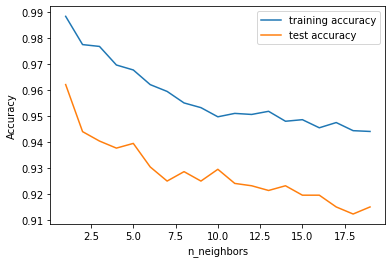

In [140]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(x_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(x_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(x_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend();

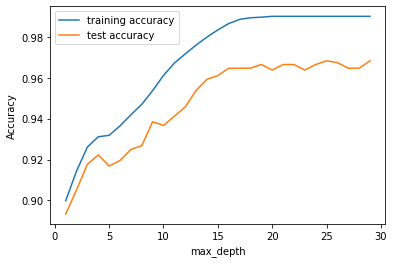

In [141]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    rf_test = RandomForestClassifier(max_depth=n)

    rf_test.fit(x_train, y_train)
    # record training set accuracy
    training_accuracy.append(rf_test.score(x_train, y_train))
    # record generalization accuracy
    test_accuracy.append(rf_test.score(x_test, y_test))
    

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

### **SVM**

In [142]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [143]:
y_test_svm = svm.predict(x_test)
y_train_svm = svm.predict(x_train)

In [144]:
acc_train_svm = accuracy_score(y_train,y_train_svm)*100
acc_test_svm = accuracy_score(y_test,y_test_svm)*100

print("Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("Accuracy on test Data: {:.3f}".format(acc_test_svm))

f1_score_train_log = metrics.f1_score(y_train,y_train_svm)
f1_score_test_log = metrics.f1_score(y_test,y_test_svm)
print("SVM : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("SVM : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_svm)
recall_score_test_log = metrics.recall_score(y_test,y_test_svm)
print("SVM: Recall on training Data: {:.3f}".format(recall_score_train_log))
print("SVM : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_svm)
precision_score_test_log = metrics.precision_score(y_test,y_test_svm)
print("SVM : precision on training Data: {:.3f}".format(precision_score_train_log))
print("SVM : precision on test Data: {:.3f}".format(precision_score_test_log))

Result('SVM',acc_train_svm,acc_test_svm,f1_score_test_log,
             recall_score_train_log,precision_score_train_log)

Accuracy on training Data: 95.527
Accuracy on test Data: 93.400
SVM : f1_score on training Data: 0.960
SVM : f1_score on test Data: 0.940

SVM: Recall on training Data: 0.971
SVM : Recall on test Data: 0.961

SVM : precision on training Data: 0.950
SVM : precision on test Data: 0.919


In [145]:
print(metrics.classification_report(y_test, y_test_svm))

              precision    recall  f1-score   support

          -1       0.95      0.90      0.93       513
           1       0.92      0.96      0.94       593

    accuracy                           0.93      1106
   macro avg       0.94      0.93      0.93      1106
weighted avg       0.93      0.93      0.93      1106



### **XGBoost**

In [146]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(x_train,y_train)

XGBClassifier()

In [147]:
y_test_xg = xg.predict(x_test)
y_train_xg = xg.predict(x_train)

In [148]:
acc_train_xg = accuracy_score(y_train,y_train_xg) *100
acc_test_xg = accuracy_score(y_test,y_test_xg)*100

print("Accuracy on training Data: {:.3f}".format(acc_train_xg))
print("Accuracy on test Data: {:.3f}".format(acc_test_xg))

f1_score_train_log = metrics.f1_score(y_train,y_train_xg)
f1_score_test_log = metrics.f1_score(y_test,y_test_xg)
print("Xg : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Xg : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_xg)
recall_score_test_log = metrics.recall_score(y_test,y_test_xg)
print("Xg: Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Xg : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_xg)
precision_score_test_log = metrics.precision_score(y_test,y_test_xg)
print("Xg : precision on training Data: {:.3f}".format(precision_score_train_log))
print("Xg : precision on test Data: {:.3f}".format(precision_score_test_log))

Result('XgbClassfier',acc_train_xg,acc_test_xg,f1_score_test_log,
             recall_score_train_log,precision_score_train_log)

Accuracy on training Data: 95.437
Accuracy on test Data: 94.304
Xg : f1_score on training Data: 0.960
Xg : f1_score on test Data: 0.948

Xg: Recall on training Data: 0.968
Xg : Recall on test Data: 0.960

Xg : precision on training Data: 0.951
Xg : precision on test Data: 0.936


In [149]:
print(metrics.classification_report(y_test, y_test_xg))

              precision    recall  f1-score   support

          -1       0.95      0.92      0.94       513
           1       0.94      0.96      0.95       593

    accuracy                           0.94      1106
   macro avg       0.94      0.94      0.94      1106
weighted avg       0.94      0.94      0.94      1106



## Decision Tree

In [150]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [151]:
y_test_dt = dt.predict(x_test)
y_train_dt = dt.predict(x_train)

In [152]:
acc_train_dt = accuracy_score(y_train,y_train_dt) *100
acc_test_dt = accuracy_score(y_test,y_test_dt)*100

print("Accuracy on training Data: {:.3f}".format(acc_train_dt))
print("Accuracy on test Data: {:.3f}".format(acc_test_dt))

f1_score_train_log = metrics.f1_score(y_train,y_train_dt)
f1_score_test_log = metrics.f1_score(y_test,y_test_dt)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_dt)
recall_score_test_log = metrics.recall_score(y_test,y_test_dt)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_dt)
precision_score_test_log = metrics.precision_score(y_test,y_test_dt)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_log))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_log))

Result('Decision Tree',acc_train_dt,acc_test_dt,f1_score_test_log,
             recall_score_train_log,precision_score_train_log)

Accuracy on training Data: 91.848
Accuracy on test Data: 91.230
Decision Tree : f1_score on training Data: 0.927
Decision Tree : f1_score on test Data: 0.920

Decision Tree : Recall on training Data: 0.929
Decision Tree : Recall on test Data: 0.936

Decision Tree : precision on training Data: 0.926
Decision Tree : precision on test Data: 0.904


In [153]:
print(metrics.classification_report(y_test, y_test_dt))

              precision    recall  f1-score   support

          -1       0.92      0.88      0.90       513
           1       0.90      0.94      0.92       593

    accuracy                           0.91      1106
   macro avg       0.91      0.91      0.91      1106
weighted avg       0.91      0.91      0.91      1106



# **6.Comparison of models**

In [154]:
res =pd.DataFrame({'ML Model':Model,'Train Accuracy':train,'Test Accuracy':test,'f1-score':f1_score ,'Recall':recall,'Precision':precision})
res

,ML Model,Train Accuracy,Test Accuracy,f1-score,Recall,Precision
0,LogisticRegression(),93.064630,90.958409,0.917628,0.947520,0.929806
1,RandomForestClassifier,99.014976,96.473779,0.967688,0.993889,0.988559
2,svm,0.988240,0.962025,0.967688,0.993889,0.988559
3,svm,95.527189,93.399638,0.939819,0.971244,0.949903
4,XgbClassfier,95.436727,94.303798,0.947544,0.968188,0.951095
5,Decision Tree,91.848427,91.229656,0.919636,0.929008,0.925515
6,KNN,0.988240,0.962025,0.919636,0.929008,0.925515
7,Logistic Regression,93.064630,90.958409,0.917628,0.947520,0.929806
8,RandomForestClassifier,99.014976,96.835443,0.971051,0.994788,0.987687
9,KNN,0.988240,0.962025,0.971051,0.994788,0.987687


In [155]:
res.sort_values(by=['Test Accuracy', 'Train Accuracy','f1-score','Recall','Precision'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy,f1-score,Recall,Precision
8,RandomForestClassifier,99.014976,96.835443,0.971051,0.994788,0.987687
1,RandomForestClassifier,99.014976,96.473779,0.967688,0.993889,0.988559
4,XgbClassfier,95.436727,94.303798,0.947544,0.968188,0.951095
11,XgbClassfier,95.436727,94.303798,0.947544,0.968188,0.951095
3,svm,95.527189,93.399638,0.939819,0.971244,0.949903
10,SVM,95.527189,93.399638,0.939819,0.971244,0.949903
5,Decision Tree,91.848427,91.229656,0.919636,0.929008,0.925515
12,Decision Tree,91.848427,91.229656,0.919636,0.929008,0.925515
0,LogisticRegression(),93.064630,90.958409,0.917628,0.947520,0.929806
7,Logistic Regression,93.064630,90.958409,0.917628,0.947520,0.929806


In [122]:
pickle.dump(lr,open('Phishing_Website.pkl','wb'))

In [ ]:
pickle.dump(dt,open('Phishing_Website_with_dt.pkl','wb'))

Random Forest works great as it yields the highest accuracy.